4 Coordinate Model

In [116]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
# get the main paths
df = pd.read_csv('../simulations/data/small_trajectories.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     774 non-null    int64  
 1   name           774 non-null    object 
 2   latitude_1     774 non-null    float64
 3   longitude_1    774 non-null    float64
 4   latitude_2     774 non-null    float64
 5   longitude_2    774 non-null    float64
 6   latitude_3     774 non-null    float64
 7   longitude_3    774 non-null    float64
 8   latitude_4     774 non-null    float64
 9   longitude_4    774 non-null    float64
 10  enter-parking  774 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 66.6+ KB


In [119]:
df.head()

,Unnamed: 0,name,latitude_1,longitude_1,latitude_2,longitude_2,latitude_3,longitude_3,latitude_4,longitude_4,enter-parking
0,0,1_C_Missed,36.111036,-115.140870,36.111097,-115.140867,36.111147,-115.140876,36.111202,-115.140939,0
1,1,2_C_Missed,36.111100,-115.140855,36.111163,-115.140871,36.111207,-115.140928,36.111219,-115.141021,0
2,2,3_C_Missed,36.111139,-115.140852,36.111204,-115.140903,36.111226,-115.140946,36.111226,-115.141043,0
3,3,4_C_Missed,36.111150,-115.140803,36.111172,-115.140846,36.111204,-115.140902,36.111213,-115.141005,0
4,4,5_C_Missed,36.111163,-115.140799,36.111186,-115.140848,36.111205,-115.140909,36.111206,-115.141019,0


In [120]:
# Get The cordinates for x
x = df[df.columns[2:10]]

# Get the last coordinate
y = df['enter-parking'].values

In [121]:
print(x)
print(y)

     latitude_1  longitude_1  latitude_2  longitude_2  latitude_3  \
0     36.111036  -115.140870   36.111097  -115.140867   36.111147   
1     36.111100  -115.140855   36.111163  -115.140871   36.111207   
2     36.111139  -115.140852   36.111204  -115.140903   36.111226   
3     36.111150  -115.140803   36.111172  -115.140846   36.111204   
4     36.111163  -115.140799   36.111186  -115.140848   36.111205   
..          ...          ...         ...          ...         ...   
769   36.111161  -115.139535   36.111236  -115.139535   36.111315   
770   36.111226  -115.139536   36.111330  -115.139533   36.111435   
771   36.111286  -115.139484   36.111358  -115.139513   36.111420   
772   36.111307  -115.139465   36.111377  -115.139499   36.111440   
773   36.111374  -115.139479   36.111418  -115.139508   36.111491   

     longitude_3  latitude_4  longitude_4  
0    -115.140876   36.111202  -115.140939  
1    -115.140928   36.111219  -115.141021  
2    -115.140946   36.111226  -115.1410

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=71)

In [123]:
# Scale data
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [124]:
x_train.shape

(580, 8)

In [125]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Model creation
model = Sequential()

# 8 neurons for input layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.3))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

In [126]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/19 [>.............................] - ETA: 5s - loss: 0.7833 - accuracy: 0.3438WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x16098b550> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY

In [127]:
losses = pd.DataFrame(model.history.history)

In [128]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

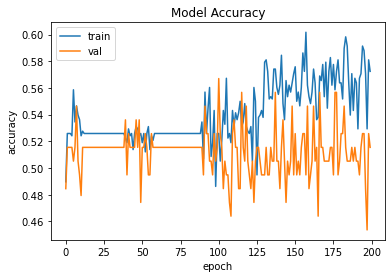

In [129]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

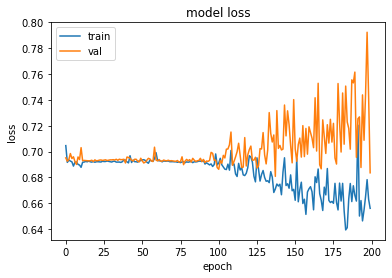

In [130]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [131]:
test_df = pd.read_csv('../simulations/data/test_small_trajectories.csv')

In [132]:
test_x = test_df[test_df.columns[2:10]]

test_y = test_df['enter-parking'].values

In [133]:
test_x = scaler.transform(test_x)

In [134]:
print(test_x)

print(test_y)

[[0.05107932 0.05039134 0.05642684 0.05452903 0.06268313 0.05761312
  0.06490483 0.07384646]
 [0.05387792 0.07877601 0.05873216 0.08125741 0.05838213 0.0843944
  0.05781392 0.09633475]
 [0.22364498 0.11621048 0.23858283 0.11933722 0.24591968 0.11869746
  0.24641111 0.128278  ]
 [0.16992897 0.03686361 0.17531562 0.03089409 0.17791071 0.02465881
  0.17722352 0.03524255]
 [0.239838   0.12079694 0.25131065 0.12299933 0.25413916 0.12390216
  0.2542089  0.13337701]
 [0.1051386  0.04998308 0.11287138 0.05263917 0.1223527  0.05578508
  0.12630174 0.06838077]
 [0.14108207 0.86641419 0.16121555 0.90310658 0.17564337 0.90748099
  0.18544767 0.90536722]
 [0.20730728 0.87796717 0.22322352 0.91306091 0.2390283  0.91753176
  0.24514919 0.90945083]
 [0.26730293 0.12177136 0.28608393 0.13609677 0.30485055 0.14913908
  0.31541568 0.16588007]
 [0.17609397 0.18803267 0.18217488 0.17939541 0.18280226 0.17086726
  0.1854599  0.1694962 ]
 [0.14916259 0.87305448 0.14987583 0.91538004 0.14800595 0.92093355
  0

In [135]:
predictions = (model.predict(test_x) > 0.5).astype("int32")

print(predictions)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [136]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.53      1.00      0.70        31

    accuracy                           0.53        58
   macro avg       0.27      0.50      0.35        58
weighted avg       0.29      0.53      0.37        58



/Users/mikey/miniforge3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikey/miniforge3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mikey/miniforge3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [137]:
print(confusion_matrix(test_y, predictions))

[[ 0 27]
 [ 0 31]]


In [138]:
# model.save('saved-model')